In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19dataset/raw_data_Indian_states.csv


 **Importing necessary modules**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**Reading data**

In [3]:
df=pd.read_csv('../input/covid19dataset/raw_data_Indian_states.csv')
df.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,30-01-2020,Kerala,1,0,0,0,NaN
1,30-01-2020,India,1,0,0,0,NaN
2,02-02-2020,Kerala,2,0,0,0,NaN
3,02-02-2020,India,2,0,0,0,NaN
4,03-02-2020,Kerala,3,0,0,0,NaN


**Check whether the dataset contains any null values**

In [4]:
df.isnull().sum()

Date           0
State          0
Confirmed      0
Recovered      0
Deceased       0
Other          0
Tested       763
dtype: int64

In [5]:
df.isna().sum()

Date           0
State          0
Confirmed      0
Recovered      0
Deceased       0
Other          0
Tested       763
dtype: int64

In [6]:
df.shape

(21675, 7)

**Filling the null values with zero**

In [7]:
a=df.fillna(0)

In [8]:
a.isna().sum()

Date         0
State        0
Confirmed    0
Recovered    0
Deceased     0
Other        0
Tested       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21675 entries, 0 to 21674
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       21675 non-null  object 
 1   State      21675 non-null  object 
 2   Confirmed  21675 non-null  int64  
 3   Recovered  21675 non-null  int64  
 4   Deceased   21675 non-null  int64  
 5   Other      21675 non-null  int64  
 6   Tested     20912 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.2+ MB


**Starting of analysis**

In [10]:
a['Date'].min()

'01-01-2021'

In [11]:
a['Date'].max()

'31-12-2020'

In [12]:
no_india=a[a['State']!='India']
no_india.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,30-01-2020,Kerala,1,0,0,0,0.0
2,02-02-2020,Kerala,2,0,0,0,0.0
4,03-02-2020,Kerala,3,0,0,0,0.0
6,14-02-2020,Kerala,3,3,0,0,0.0
8,02-03-2020,Delhi,1,0,0,0,0.0


In [13]:
final = no_india[no_india['Date']=='31-10-2021'].reset_index()
final

,index,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,21638,31-10-2021,Andaman and Nicobar Islands,7651,7518,129,0,598033.0
1,21639,31-10-2021,Andhra Pradesh,2066450,2047722,14373,0,29518787.0
2,21640,31-10-2021,Arunachal Pradesh,55155,54774,280,0,1185436.0
3,21641,31-10-2021,Assam,610645,600974,5997,1347,24712042.0
4,21642,31-10-2021,Bihar,726098,716390,9661,1,50531824.0
5,21643,31-10-2021,Chandigarh,65351,64495,820,0,792851.0
6,21644,31-10-2021,Chhattisgarh,1006052,992159,13577,0,13709510.0
7,21645,31-10-2021,Delhi,1439870,1414431,25091,0,29427753.0
8,21646,31-10-2021,Dadra and Nagar Haveli and Daman and Diu,10681,10644,4,31,72410.0
9,21647,31-10-2021,Goa,178108,174392,3364,0,1468399.0


In [14]:
final_sorted=final.sort_values('Confirmed',ascending=False)
final_sorted

,index,Date,State,Confirmed,Recovered,Deceased,Other,Tested
19,21657,31-10-2021,Maharashtra,6611078,6450585,140216,3619,62667211.0
16,21654,31-10-2021,Kerala,4968657,4857181,31681,529,37886378.0
15,21653,31-10-2021,Karnataka,2988333,2941578,38082,29,50873103.0
31,21669,31-10-2021,Tamil Nadu,2702623,2655015,36116,0,51159242.0
1,21639,31-10-2021,Andhra Pradesh,2066450,2047722,14373,0,29518787.0
33,21672,31-10-2021,Uttar Pradesh,1710158,1687151,22900,0,83635222.0
35,21674,31-10-2021,West Bengal,1592908,1565471,19141,0,19228303.0
7,21645,31-10-2021,Delhi,1439870,1414431,25091,0,29427753.0
25,21663,31-10-2021,Odisha,1041457,1029147,8386,0,21994343.0
6,21644,31-10-2021,Chhattisgarh,1006052,992159,13577,0,13709510.0


In [15]:
above_6=final_sorted[final_sorted['Confirmed']>=600000]
above_6

,index,Date,State,Confirmed,Recovered,Deceased,Other,Tested
19,21657,31-10-2021,Maharashtra,6611078,6450585,140216,3619,62667211.0
16,21654,31-10-2021,Kerala,4968657,4857181,31681,529,37886378.0
15,21653,31-10-2021,Karnataka,2988333,2941578,38082,29,50873103.0
31,21669,31-10-2021,Tamil Nadu,2702623,2655015,36116,0,51159242.0
1,21639,31-10-2021,Andhra Pradesh,2066450,2047722,14373,0,29518787.0
33,21672,31-10-2021,Uttar Pradesh,1710158,1687151,22900,0,83635222.0
35,21674,31-10-2021,West Bengal,1592908,1565471,19141,0,19228303.0
7,21645,31-10-2021,Delhi,1439870,1414431,25091,0,29427753.0
25,21663,31-10-2021,Odisha,1041457,1029147,8386,0,21994343.0
6,21644,31-10-2021,Chhattisgarh,1006052,992159,13577,0,13709510.0


In [16]:
below_6=final_sorted[final_sorted['Confirmed']<=600000]
below_6

,index,Date,State,Confirmed,Recovered,Deceased,Other,Tested
13,21651,31-10-2021,Jharkhand,348764,343518,5138,0,15985878.0
34,21673,31-10-2021,Uttarakhand,343896,330195,7400,6150,7781148.0
14,21652,31-10-2021,Jammu and Kashmir,332249,326915,4432,0,16202346.0
11,21649,31-10-2021,Himachal Pradesh,224106,218410,3738,16,3685011.0
9,21647,31-10-2021,Goa,178108,174392,3364,0,1468399.0
27,21665,31-10-2021,Puducherry,128013,125726,1857,0,1919060.0
21,21659,31-10-2021,Manipur,123731,121102,1921,0,1367673.0
23,21661,31-10-2021,Mizoram,121359,114612,432,0,1298444.0
32,21670,31-10-2021,Tripura,84468,83466,813,63,1983127.0
20,21658,31-10-2021,Meghalaya,83627,81746,1450,0,1151665.0


**Graphical Visualization**

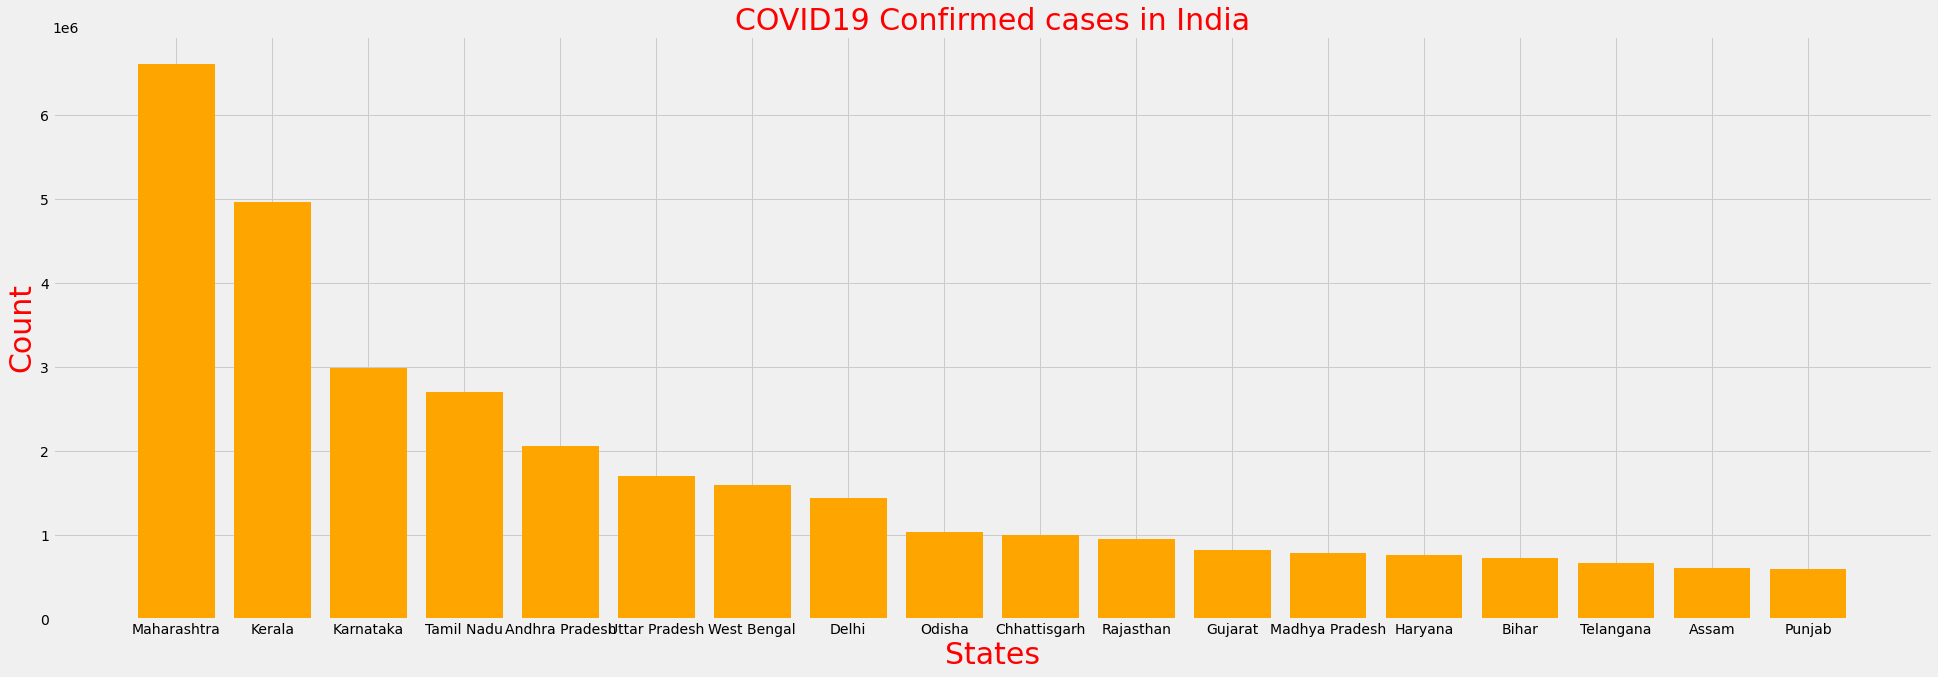

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30,10))

plt.bar(above_6['State'],above_6['Confirmed'],color='orange')
plt.title('COVID19 Confirmed cases in India',color='red',size=30)
plt.xlabel("States",color="red",size=30)
plt.ylabel("Count",color="red",size=30)
plt.xticks(above_6['State'])


plt.plot()
plt.show()

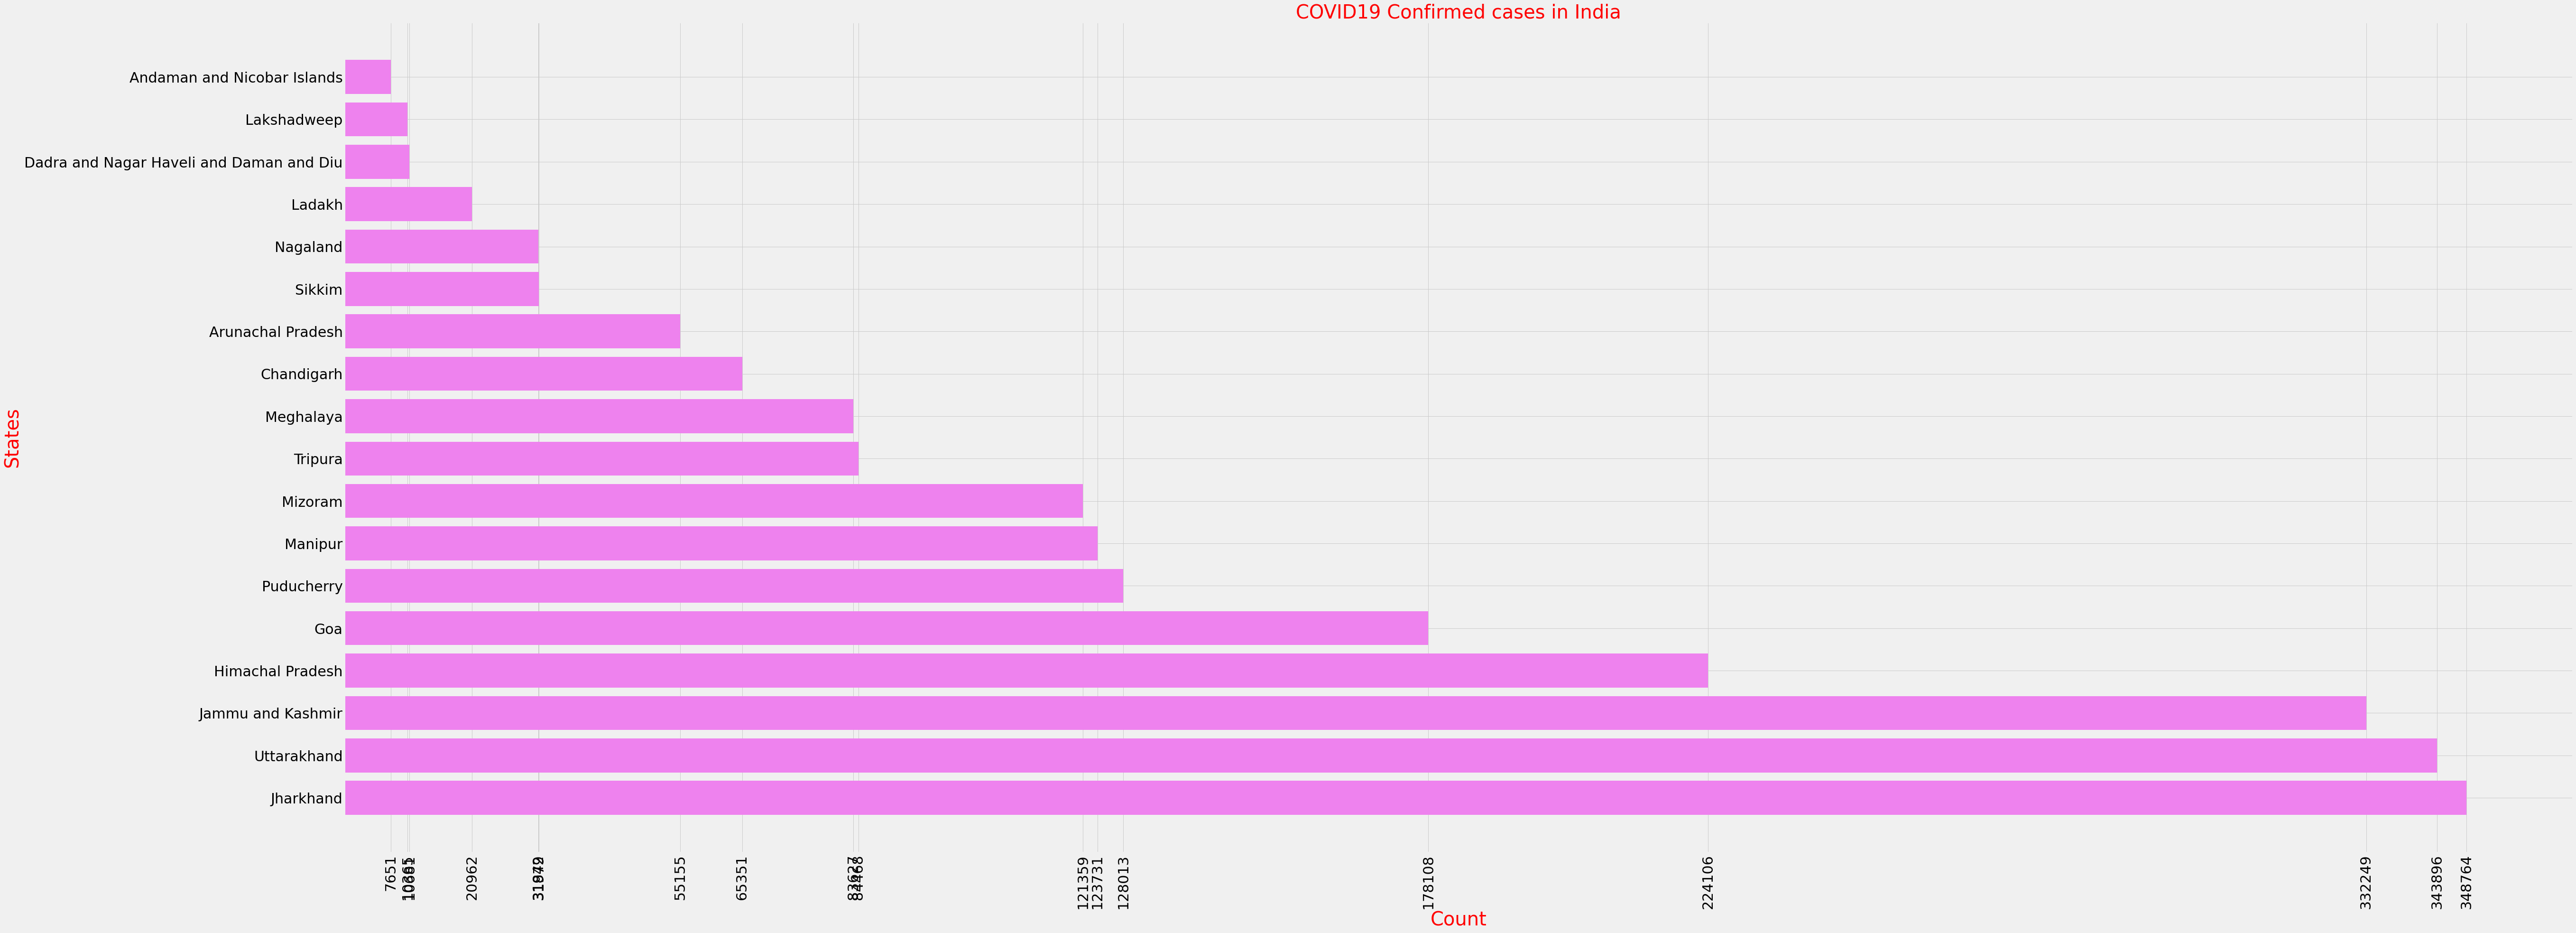

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(75,30))

plt.barh(below_6['State'],below_6['Confirmed'],color='violet')
plt.title('COVID19 Confirmed cases in India',color='red',size=40)
plt.yticks(below_6['State'],size=30)
plt.xticks(below_6['Confirmed'],size=30,rotation='vertical')
plt.xlabel('Count',color='red',size=40)
plt.ylabel('States',color='red',size=40)


plt.plot()
plt.show()